# CNN Scratch implimentation

In [2]:
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

In [3]:
def read_image(path):
    oriimg=cv2.imread(path)
    #newimg = cv2.resize(oriimg,(32,32))
    return np.array(oriimg)

In [4]:

def load_images(path):
    image_path = glob.glob(path)
    image_array = np.array([read_image(image_path[i]) for i in range(100)])
    #image_array = np.array([np.array(cv2.imread(image_path[i])) for i in range(len())])
    return image_array

### Loading images for processing

In [5]:
image_data = load_images("dataset/faces/*")
print(len(image_data))

100


In [6]:
def convolution(image_data,kernel):
    if kernel == "spiral":
        kernel = [-1,1,-1,1,0,1,-1,1,-1]
    if kernel == "sharpen":
        kernel = [0,-1,0,-1,5,-1,0,-1,0]
    if kernel == "identity":
        kernel = [0,0,0,0,1,0,0,0,0] 
    output_array=np.zeros((image_data.shape[0]-2,image_data.shape[1]-2,image_data.shape[2]))
    image = np.copy(image_data)
    #image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    for i in range(1,len(image)-2):
        for j in range(1,len(image[i])-2):
            n=0
            for k in range(i-int(3/2),i+int(3/2)):
                for l in range(j-int(3/2),j+int(3/2)):
                    #print(str(i)+","+str(j)+"  "+str(k)+","+str(l))
                    output_array[i][j][0]+=image[k][l][0]*kernel[n]
                    output_array[i][j][1]+=image[k][l][1]*kernel[n]
                    output_array[i][j][2]+=image[k][l][2]*kernel[n]
                    n+=1
    return np.array(output_array)

### Activation layer relu is used

In [7]:
def relu(image):
    for i in image:
        for j in i:
            for k in j:
                if k < 0:
                    k = 0
                    #print("h")
    return(np.array(image))

In [8]:
def pooling(o,type):
    a=np.zeros((int(o.shape[0]/2),int(o.shape[1]/2),3))
    if type == "meanpool":
        
        for i in range(0,o.shape[0]-2,2):
            for j in range(0,o.shape[1]-2,2):
                for k in range(i,i+2):
                    for l in range(j,j+2):

                        a[int(i/2)][int(j/2)][0] += o[k][l][0]
                        a[int(i/2)][int(j/2)][1] += o[k][l][1]
                        a[int(i/2)][int(j/2)][2] += o[k][l][2]
                            
        a[int(i/2)][int(j/2)][0]/=4
        a[int(i/2)][int(j/2)][1]/=4
        a[int(i/2)][int(j/2)][2]/=4
        return a
    
    elif type == "maxpool":
        for i in range(0,o.shape[0]-2,2):
            for j in range(0,o.shape[1]-2,2):
                for k in range(i,i+2):
                    for l in range(j,j+2):
                        
                        if o[k][l][0] > a[int(i/2)][int(j/2)][0]:
                            a[int(i/2)][int(j/2)][0] = o[k][l][0]
                        if o[k][l][1] > a[int(i/2)][int(j/2)][1]:
                            a[int(i/2)][int(j/2)][1] = o[k][l][1]
                        if o[k][l][2] > a[int(i/2)][int(j/2)][2]:
                            a[int(i/2)][int(j/2)][2] = o[k][l][2]                   

        return a

In [23]:
def flatten(input_array):
    o=[]
    for i in input_array:
        for j in i:
            for k in j:
                o.append(k)
    return(np.array(o))

In [31]:
def dropout(input_array,probability):
    o=np.zeros((len(input_array)))
    for i in range(len(input_array)):
        if random.uniform(0, 1) < probability:
            o[i]=0
    return o

In [9]:
o = convolution(image_data[11],kernel="spiral")
o = relu(o)
o = convolution(o,kernel="sharpen")
o = relu(o)
o = pooling(o,type="maxpool")


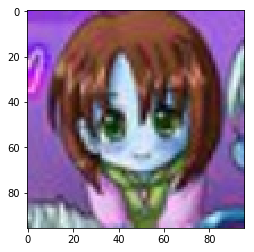

In [10]:

plt.imshow(image_data[11])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


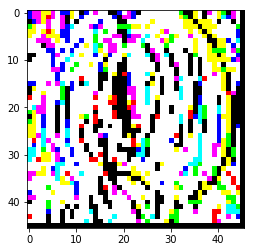

In [11]:
plt.imshow(o)

In [22]:
random.uniform(0, 1)

0.2706373208654381

In [ ]:
o = flatten(o)
o = dropout(o,probability=0.25)
o = dense(o,)